# Social Network Analysis (SNA; 사회적 연결망 분석)

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import zipfile
from google.colab import files

# Creator "Mark Newman on Fri Jul 21 12:44:53 2006"

myfile = files.upload()
G = nx.read_gml('lesmis.gml')
# zf = zipfile.ZipFile('lesmis.zip')
# txt = zf.read('lesmis.txt').decode()
# gml = zf.read('lesmis.gml').decode()
# gml = gml.split('\n')[1:]
# G = nx.parse_gml(gml)

Saving lesmis.gml to lesmis.gml


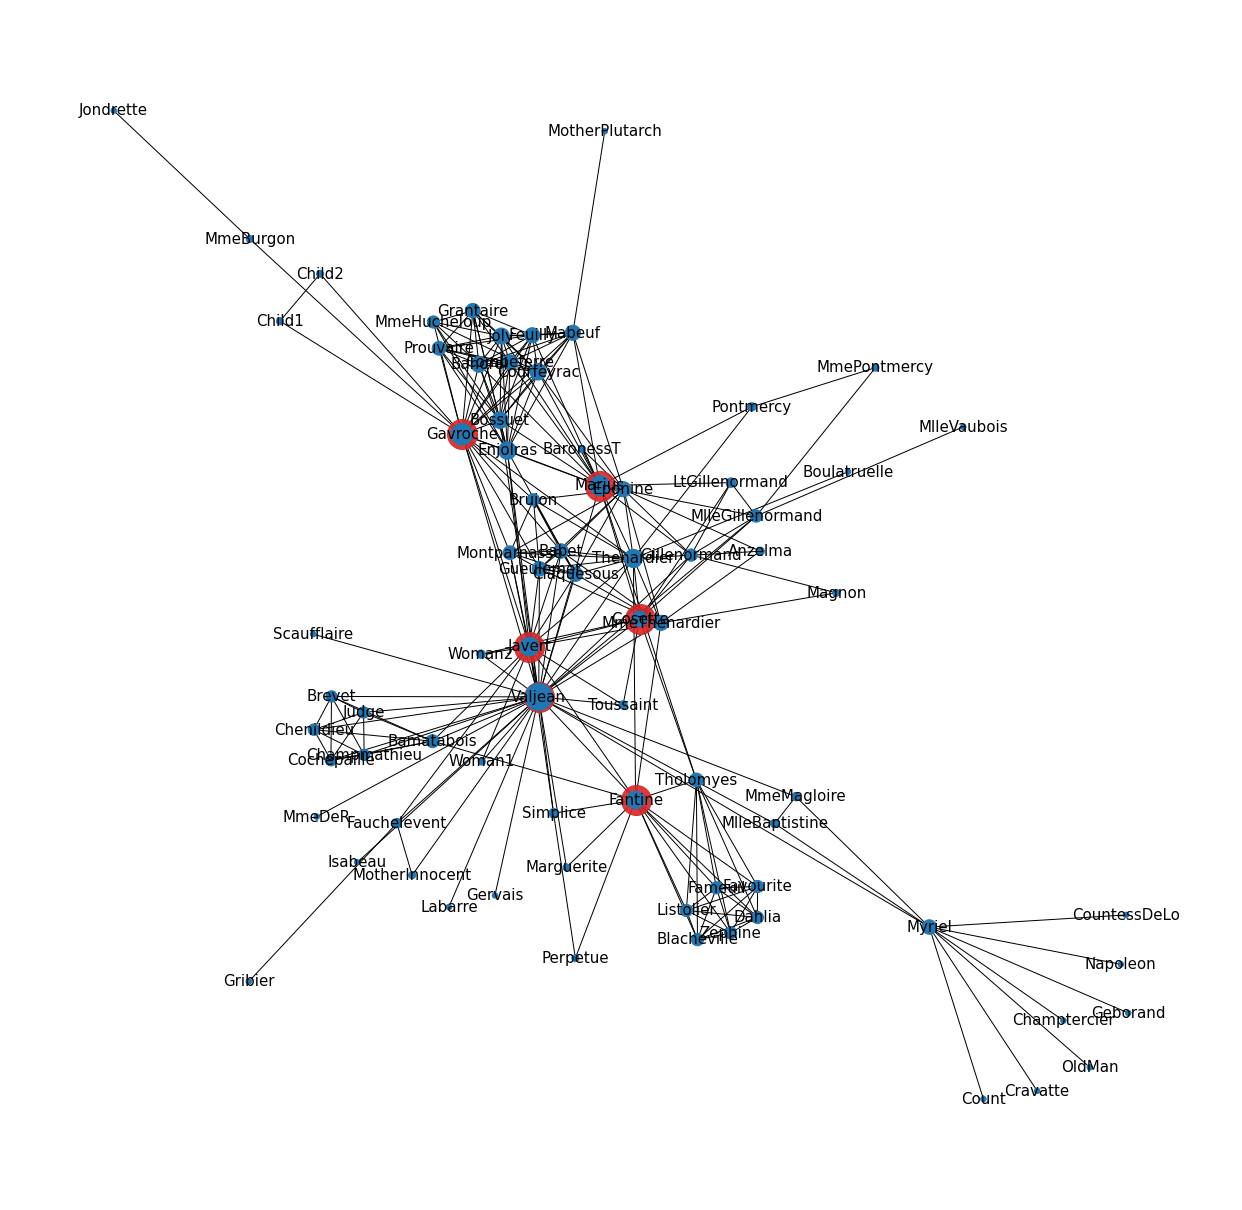

In [3]:
plt.figure(figsize=(22, 22))

degree = nx.degree(G)
pos=nx.spring_layout(G)
options = {"edgecolors": "tab:red", "node_size": 900, "alpha": 0.9}
nx.draw_networkx_nodes(G, pos, nodelist=['Valjean','Fantine', 'Gavroche','Marius','Javert','Cosette'], node_color="tab:red",**options)   # 주요 등장인물들 빨간 노드로 표시
nx.draw(G, pos, with_labels=True, node_size=[10 + v[1]*20 for v in degree], font_size = 15)
# 시각화 (degree가 클수록 원의 크기도 크도록)
plt.show()

## 1) Graph Information

In [4]:
print('Nodes:', G.nodes)
print('Number of nodes:', nx.number_of_nodes(G))
print('Edges:', G.edges)
print('Number of edges:', nx.number_of_edges(G))

Nodes: ['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup']
Number of 

In [5]:
print(nx.info(G))

Graph with 77 nodes and 254 edges


- degree: node와 연결된 모든 edge의 수

In [6]:
degree = nx.degree(G)
print(degree)

[('Myriel', 10), ('Napoleon', 1), ('MlleBaptistine', 3), ('MmeMagloire', 3), ('CountessDeLo', 1), ('Geborand', 1), ('Champtercier', 1), ('Cravatte', 1), ('Count', 1), ('OldMan', 1), ('Labarre', 1), ('Valjean', 36), ('Marguerite', 2), ('MmeDeR', 1), ('Isabeau', 1), ('Gervais', 1), ('Tholomyes', 9), ('Listolier', 7), ('Fameuil', 7), ('Blacheville', 7), ('Favourite', 7), ('Dahlia', 7), ('Zephine', 7), ('Fantine', 15), ('MmeThenardier', 11), ('Thenardier', 16), ('Cosette', 11), ('Javert', 17), ('Fauchelevent', 4), ('Bamatabois', 8), ('Perpetue', 2), ('Simplice', 4), ('Scaufflaire', 1), ('Woman1', 2), ('Judge', 6), ('Champmathieu', 6), ('Brevet', 6), ('Chenildieu', 6), ('Cochepaille', 6), ('Pontmercy', 3), ('Boulatruelle', 1), ('Eponine', 11), ('Anzelma', 3), ('Woman2', 3), ('MotherInnocent', 2), ('Gribier', 1), ('Jondrette', 1), ('MmeBurgon', 2), ('Gavroche', 22), ('Gillenormand', 7), ('Magnon', 2), ('MlleGillenormand', 7), ('MmePontmercy', 2), ('MlleVaubois', 1), ('LtGillenormand', 4), ('

In [7]:
print(list(G.neighbors('Valjean')))

['Myriel', 'MlleBaptistine', 'MmeMagloire', 'Labarre', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Woman2', 'MotherInnocent', 'Gavroche', 'Gillenormand', 'MlleGillenormand', 'Marius', 'Enjolras', 'Bossuet', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint']


## 2) Adjacency matrix

In [8]:
# Adjacency matrix
A = nx.to_numpy_matrix(G)
print(A)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


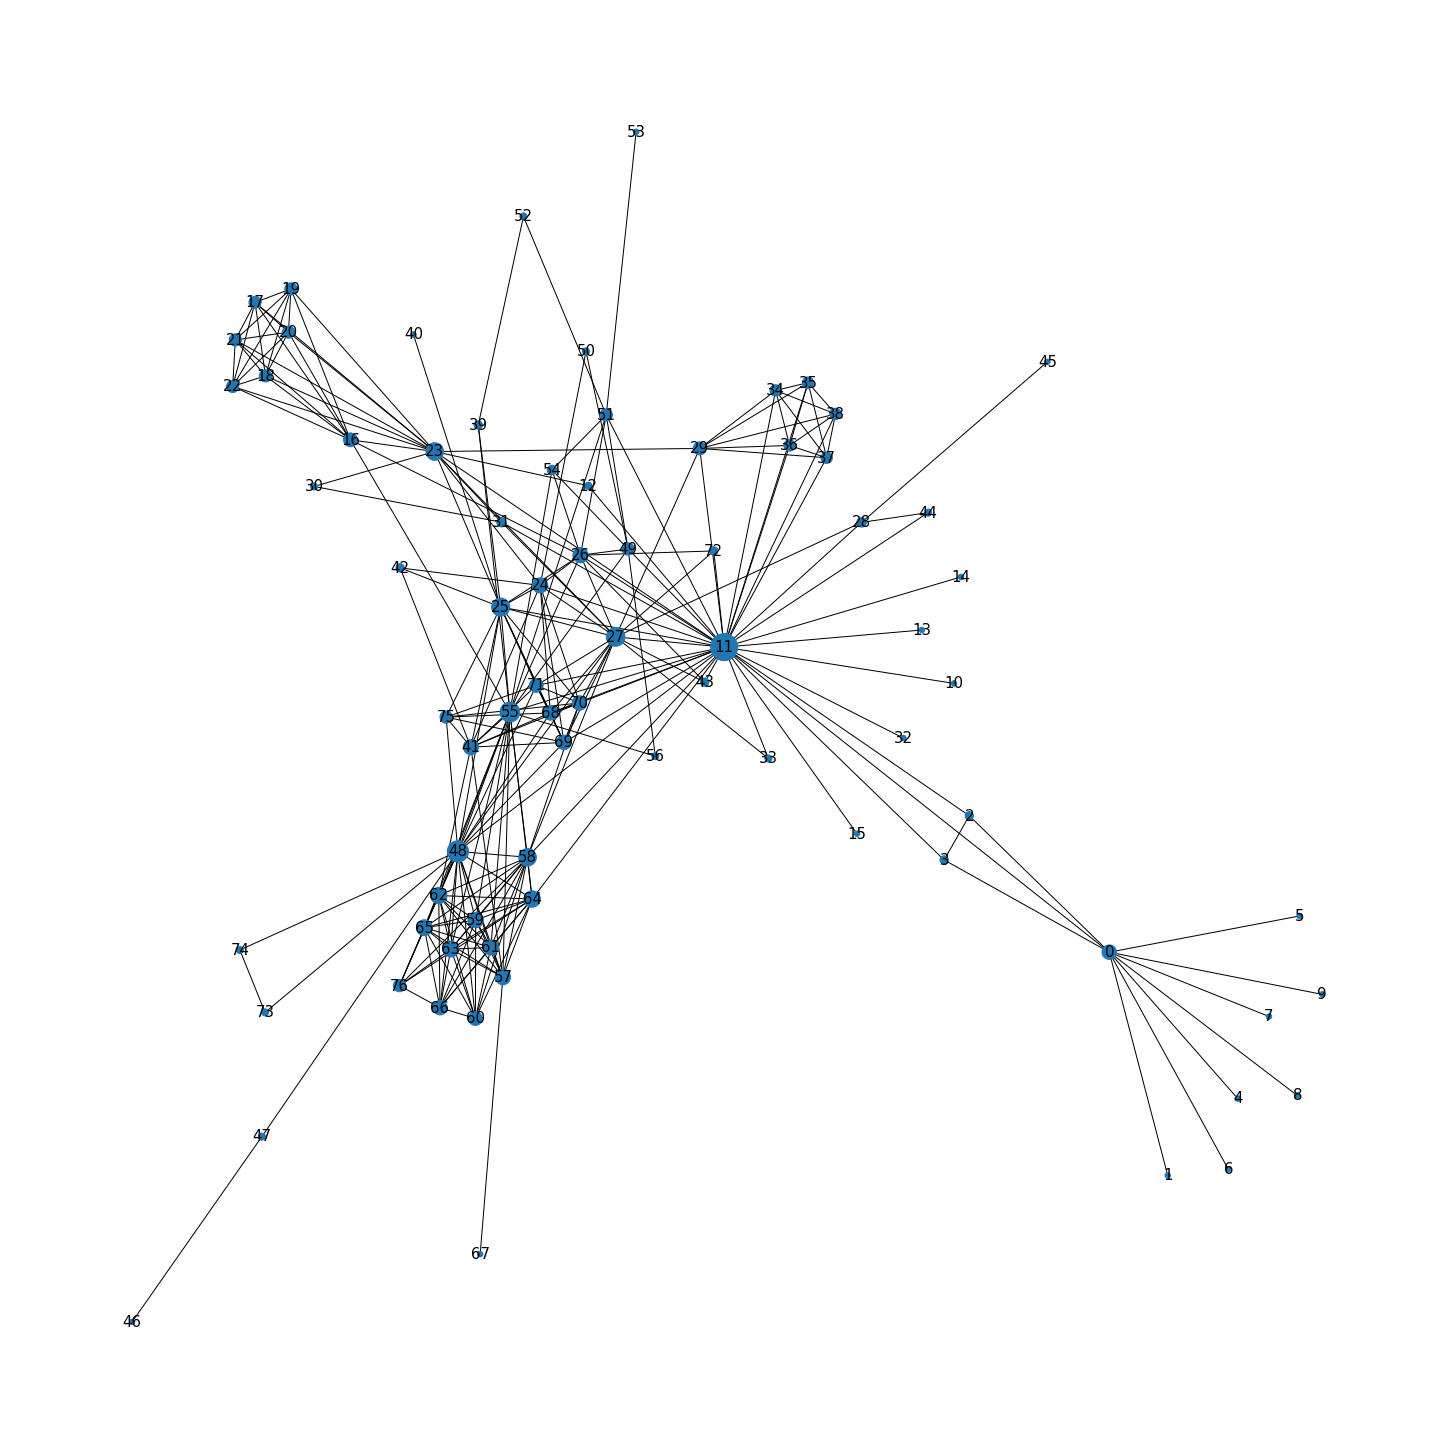

{0: 'Myriel', 1: 'Napoleon', 2: 'MlleBaptistine', 3: 'MmeMagloire', 4: 'CountessDeLo', 5: 'Geborand', 6: 'Champtercier', 7: 'Cravatte', 8: 'Count', 9: 'OldMan', 10: 'Labarre', 11: 'Valjean', 12: 'Marguerite', 13: 'MmeDeR', 14: 'Isabeau', 15: 'Gervais', 16: 'Tholomyes', 17: 'Listolier', 18: 'Fameuil', 19: 'Blacheville', 20: 'Favourite', 21: 'Dahlia', 22: 'Zephine', 23: 'Fantine', 24: 'MmeThenardier', 25: 'Thenardier', 26: 'Cosette', 27: 'Javert', 28: 'Fauchelevent', 29: 'Bamatabois', 30: 'Perpetue', 31: 'Simplice', 32: 'Scaufflaire', 33: 'Woman1', 34: 'Judge', 35: 'Champmathieu', 36: 'Brevet', 37: 'Chenildieu', 38: 'Cochepaille', 39: 'Pontmercy', 40: 'Boulatruelle', 41: 'Eponine', 42: 'Anzelma', 43: 'Woman2', 44: 'MotherInnocent', 45: 'Gribier', 46: 'Jondrette', 47: 'MmeBurgon', 48: 'Gavroche', 49: 'Gillenormand', 50: 'Magnon', 51: 'MlleGillenormand', 52: 'MmePontmercy', 53: 'MlleVaubois', 54: 'LtGillenormand', 55: 'Marius', 56: 'BaronessT', 57: 'Mabeuf', 58: 'Enjolras', 59: 'Combeferre

In [9]:
plt.figure(figsize=(20, 20))
G_Adjacency=nx.from_numpy_matrix(A) # node label이 지정되지 않은 상태 (0, 1, 2, ...)

nx.draw(G_Adjacency, with_labels=True, node_size=[10 + v[1]*20 for v in degree], font_size = 15)
plt.show()

mapping = {i: f for i, f in enumerate(G.nodes)}
print(mapping) # 변경할 label 형태



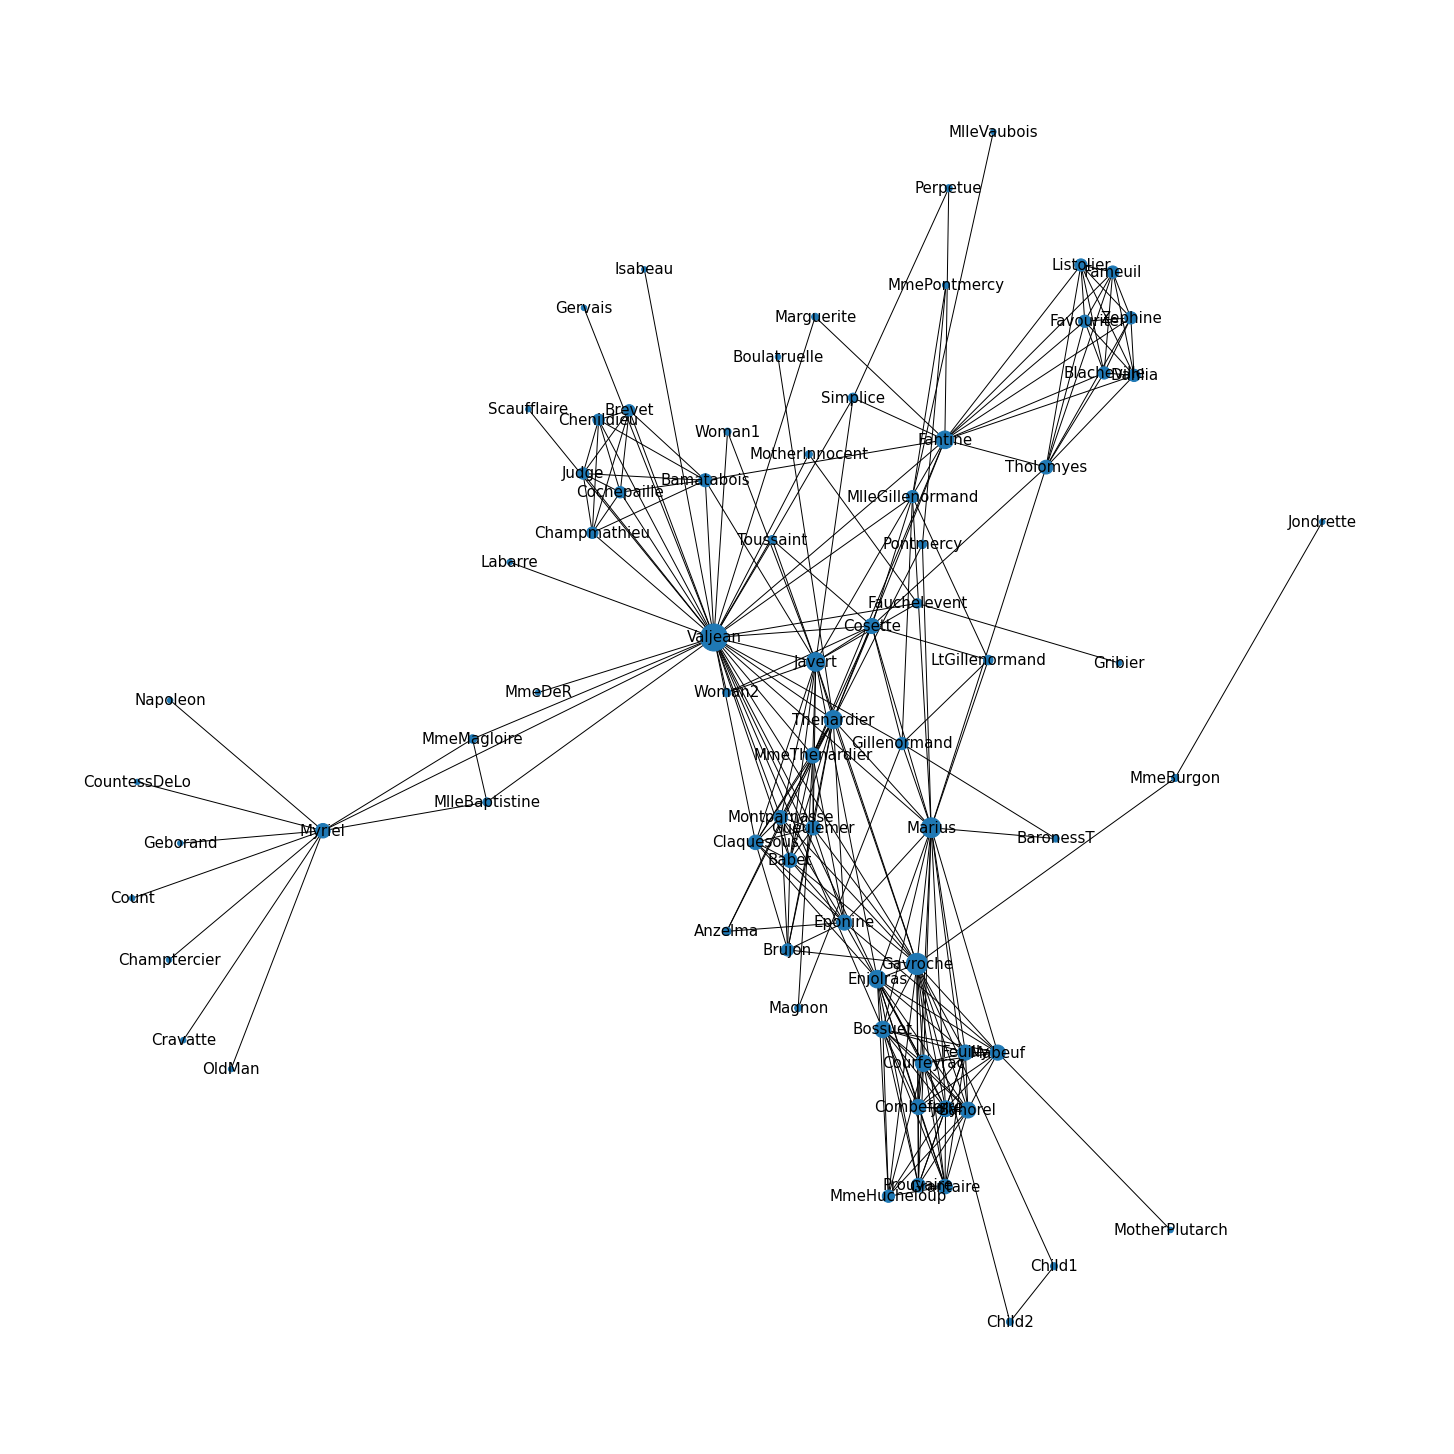

In [10]:
plt.figure(figsize=(20,20))
H = nx.relabel_nodes(G_Adjacency, mapping)
nx.draw(H, with_labels=True, node_size=[10 + v[1]*20 for v in degree], font_size = 15)

plt.show()

## 3) Graph with Edge attribute(Weight)

- Node:레미제라블 인물
- Edge: 인물들 간의 접촉

In [11]:
print(nx.info(G))

Graph with 77 nodes and 254 edges


In [12]:
G.nodes

NodeView(('Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup'))

In [13]:
G.edges

EdgeView([('Myriel', 'Napoleon'), ('Myriel', 'MlleBaptistine'), ('Myriel', 'MmeMagloire'), ('Myriel', 'CountessDeLo'), ('Myriel', 'Geborand'), ('Myriel', 'Champtercier'), ('Myriel', 'Cravatte'), ('Myriel', 'Count'), ('Myriel', 'OldMan'), ('Myriel', 'Valjean'), ('MlleBaptistine', 'MmeMagloire'), ('MlleBaptistine', 'Valjean'), ('MmeMagloire', 'Valjean'), ('Labarre', 'Valjean'), ('Valjean', 'Marguerite'), ('Valjean', 'MmeDeR'), ('Valjean', 'Isabeau'), ('Valjean', 'Gervais'), ('Valjean', 'Fantine'), ('Valjean', 'MmeThenardier'), ('Valjean', 'Thenardier'), ('Valjean', 'Cosette'), ('Valjean', 'Javert'), ('Valjean', 'Fauchelevent'), ('Valjean', 'Bamatabois'), ('Valjean', 'Simplice'), ('Valjean', 'Scaufflaire'), ('Valjean', 'Woman1'), ('Valjean', 'Judge'), ('Valjean', 'Champmathieu'), ('Valjean', 'Brevet'), ('Valjean', 'Chenildieu'), ('Valjean', 'Cochepaille'), ('Valjean', 'Woman2'), ('Valjean', 'MotherInnocent'), ('Valjean', 'Gavroche'), ('Valjean', 'Gillenormand'), ('Valjean', 'MlleGillenorm

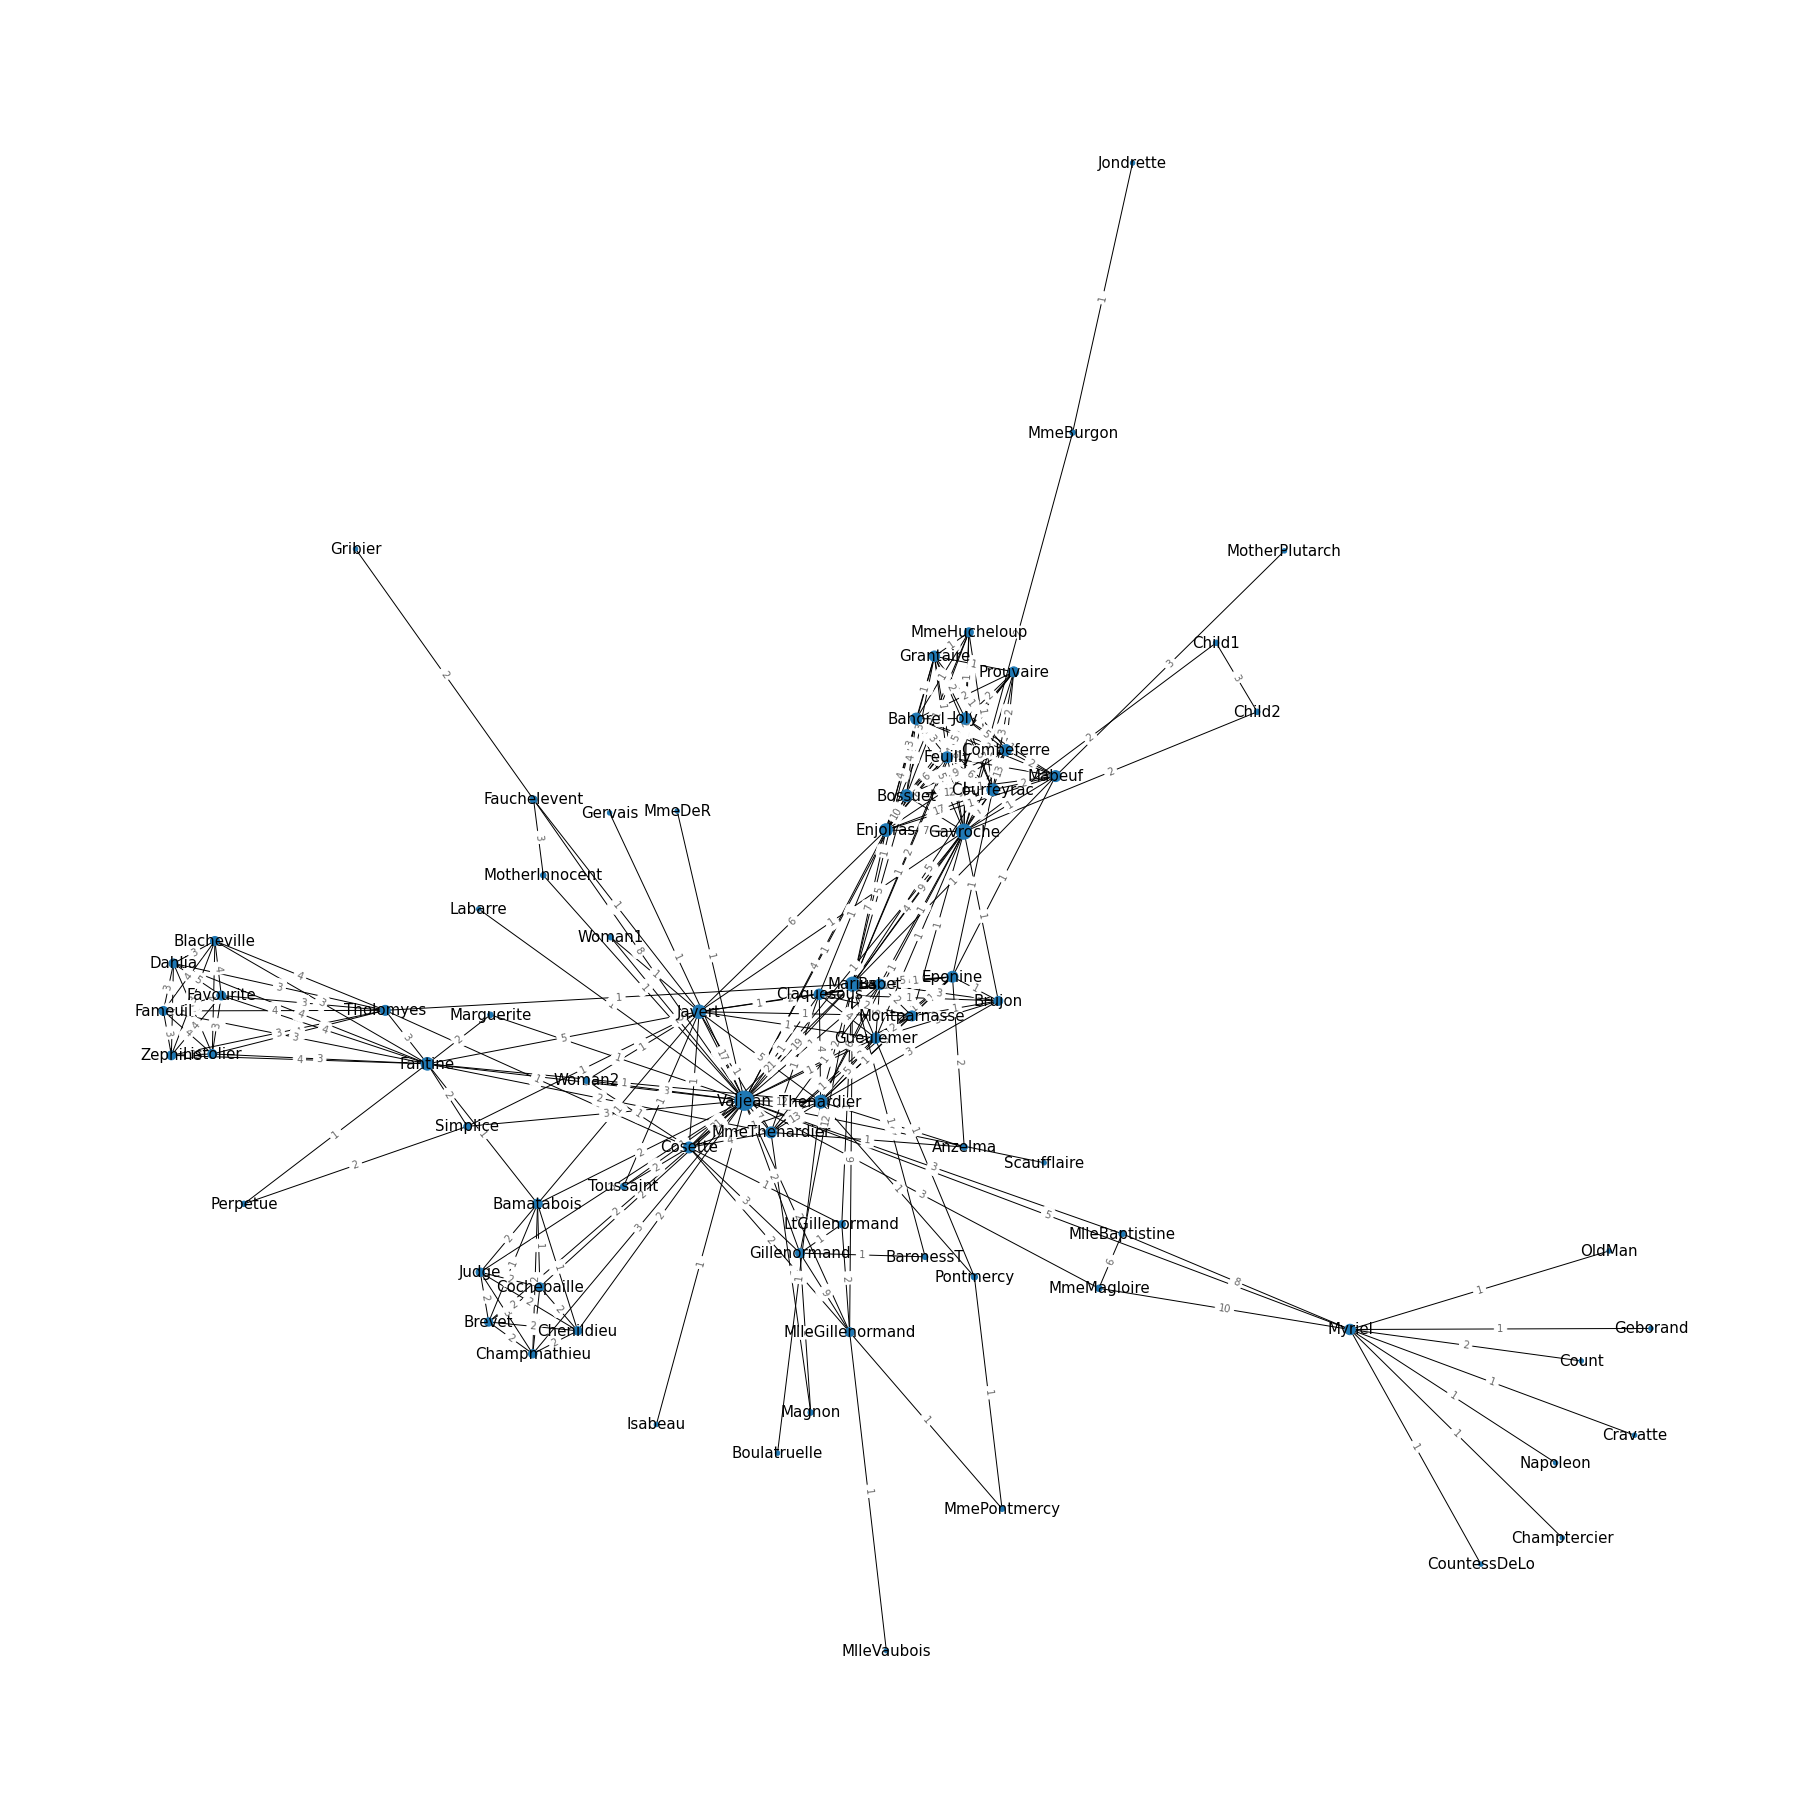

In [14]:
plt.figure(figsize=(25, 25))

degree = nx.degree(G)
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=[10 + v[1]*10 for v in degree], font_size = 15) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
edge_weight = nx.get_edge_attributes(G, 'value')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight, alpha=0.6, font_size=10) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html
plt.show()

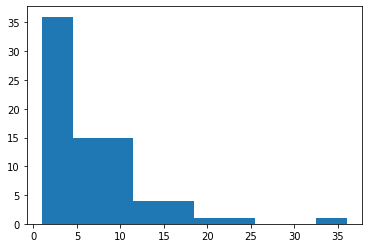

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dict(degree).values())
plt.show()

In [16]:
print('전체 shortest path:\n',nx.shortest_path(G))
print('OldMan to Valjean:',nx.shortest_path(G, 'OldMan', 'Valjean'))
print('OldMan to Valjean:',nx.shortest_path(G, 'OldMan', 'Valjean', weight = 'value'))# 여러 route가 있을 때 weight을 고려하여 shortest path 계산

전체 shortest path:
 {'Myriel': {'Myriel': ['Myriel'], 'Napoleon': ['Myriel', 'Napoleon'], 'MlleBaptistine': ['Myriel', 'MlleBaptistine'], 'MmeMagloire': ['Myriel', 'MmeMagloire'], 'CountessDeLo': ['Myriel', 'CountessDeLo'], 'Geborand': ['Myriel', 'Geborand'], 'Champtercier': ['Myriel', 'Champtercier'], 'Cravatte': ['Myriel', 'Cravatte'], 'Count': ['Myriel', 'Count'], 'OldMan': ['Myriel', 'OldMan'], 'Valjean': ['Myriel', 'Valjean'], 'Labarre': ['Myriel', 'Valjean', 'Labarre'], 'Marguerite': ['Myriel', 'Valjean', 'Marguerite'], 'MmeDeR': ['Myriel', 'Valjean', 'MmeDeR'], 'Isabeau': ['Myriel', 'Valjean', 'Isabeau'], 'Gervais': ['Myriel', 'Valjean', 'Gervais'], 'Fantine': ['Myriel', 'Valjean', 'Fantine'], 'MmeThenardier': ['Myriel', 'Valjean', 'MmeThenardier'], 'Thenardier': ['Myriel', 'Valjean', 'Thenardier'], 'Cosette': ['Myriel', 'Valjean', 'Cosette'], 'Javert': ['Myriel', 'Valjean', 'Javert'], 'Fauchelevent': ['Myriel', 'Valjean', 'Fauchelevent'], 'Bamatabois': ['Myriel', 'Valjean', 'Bam

[('Myriel', 31), ('Napoleon', 1), ('MlleBaptistine', 17), ('MmeMagloire', 19), ('CountessDeLo', 1), ('Geborand', 1), ('Champtercier', 1), ('Cravatte', 1), ('Count', 2), ('OldMan', 1), ('Labarre', 1), ('Valjean', 158), ('Marguerite', 3), ('MmeDeR', 1), ('Isabeau', 1), ('Gervais', 1), ('Tholomyes', 26), ('Listolier', 24), ('Fameuil', 24), ('Blacheville', 25), ('Favourite', 26), ('Dahlia', 25), ('Zephine', 24), ('Fantine', 47), ('MmeThenardier', 34), ('Thenardier', 61), ('Cosette', 68), ('Javert', 47), ('Fauchelevent', 14), ('Bamatabois', 11), ('Perpetue', 3), ('Simplice', 8), ('Scaufflaire', 1), ('Woman1', 3), ('Judge', 14), ('Champmathieu', 14), ('Brevet', 11), ('Chenildieu', 11), ('Cochepaille', 11), ('Pontmercy', 3), ('Boulatruelle', 1), ('Eponine', 19), ('Anzelma', 5), ('Woman2', 5), ('MotherInnocent', 4), ('Gribier', 2), ('Jondrette', 1), ('MmeBurgon', 3), ('Gavroche', 56), ('Gillenormand', 29), ('Magnon', 2), ('MlleGillenormand', 23), ('MmePontmercy', 2), ('MlleVaubois', 1), ('LtGi

{'boxes': [<matplotlib.lines.Line2D at 0x7f0704b05910>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0704afc950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0704ad6990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0704ad6450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0704b05e90>,
  <matplotlib.lines.Line2D at 0x7f0704afc410>]}

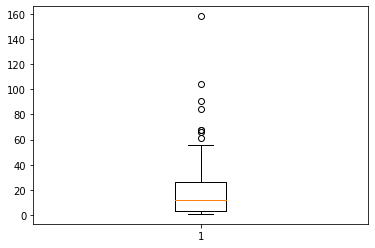

In [17]:
my_degrees = G.degree(weight='value');
print(my_degrees)
degree_values = [v for k, v in my_degrees]
fig = plt.figure();
plt.boxplot(degree_values)

# Step 3. Social Network Analysis

## 1) Structure
- diameter: 네트워크에서 가장 멀리 연결된 pair의 거리
  - 모든 노드 쌍에 대해 Shortest Path를 계산 후, 그 중 가장 큰 값을 가지는 Path의 길이
- density: 모든 edge의 개수와 실제 edge 수(k)의 비
  - undirected: $k/n(n-1)/2$
  - directed: $k/n(n-1)$
- reciprocity: 주고 받는 비율 (i.e., A가 B를 친구로 지명하였을 때, B가 A를 친구로 지명) 
  - directed graph에서만 의미가 있음
- transitivity: 3 이상의 관계에서 연결된 비율 (i.e., A가 B를 친구로 지명하고, B는 C를 친구로 지명했을 때, A가 C를 친구로 지명)


In [18]:
print('diamter:', nx.diameter(G))
print('density:', nx.density(G))
print('transitivity:', nx.transitivity(G))
print('reciprocity:', nx.reciprocity(G))

diamter: 5
density: 0.08680792891319207
transitivity: 0.49893162393162394
reciprocity: 0.0


## 2) Centrality
- Degree centrality (연결 중심성): 마당발이 누구인가? 누가 직접적 이웃이 가장 많은가?
  - Normalized degree centrality: 표준화를 위해 전체를 N-1로 나눠줌
- Betweenness centrality (매개 중심성): 얼마나 많은 최단 경로가 특정 노드를 지나는가?
  - Broker 역할을 하는 node를 찾을 수 있음
  - $C_B(i)=\sum_{j<k}g_{jk}(i)/g_{jk}$ where $g_{jk}$: jk를 연결하는 geodesics 수, 그 중 $g_{jk}(i)$: node i가 포함되어있는 경우
  - Normalized betweeness centrality: $C_B^*(i)=\frac{C_B(i)}{\frac{(N-1)(N-2)}{2}}$
- Closeness centrality (근접 중심성): 누가 다른 노드들에 대한 최단거리를 가지는가? (다른 노드들에 가장 빨리 정보를 확산시킬 수 있는가?)
  - 모든 다른 노드들과의 거리가 가장 가까운 노드가 중요한 노드
  - $C_C(i)=[\sum_{j=1}^{N-1}d(i,j)]^{-1}$
  - Normalized closness centrality: $C_C^*(i)=(N-1)C_C(i)$
- Eigenvector centrality (Bonacich power centrality): 누가 중요한 노드들과 연결이 많이 되어 있는가? 
  - 연결된 이웃의 중요도에 가중치를 부여
  - $C_E(v_i) \propto\sum_{v_j \in N_i}A_{ij}C_E(v_j)$, $A\mathbf{x}=\lambda \mathbf{x}$

- [참고](https://chaelist.github.io/docs/network_analysis/network_basics/#neighbors--degree)
- 이 외에 Katz centrality, PageRank [참고](https://bab2min.tistory.com/554)


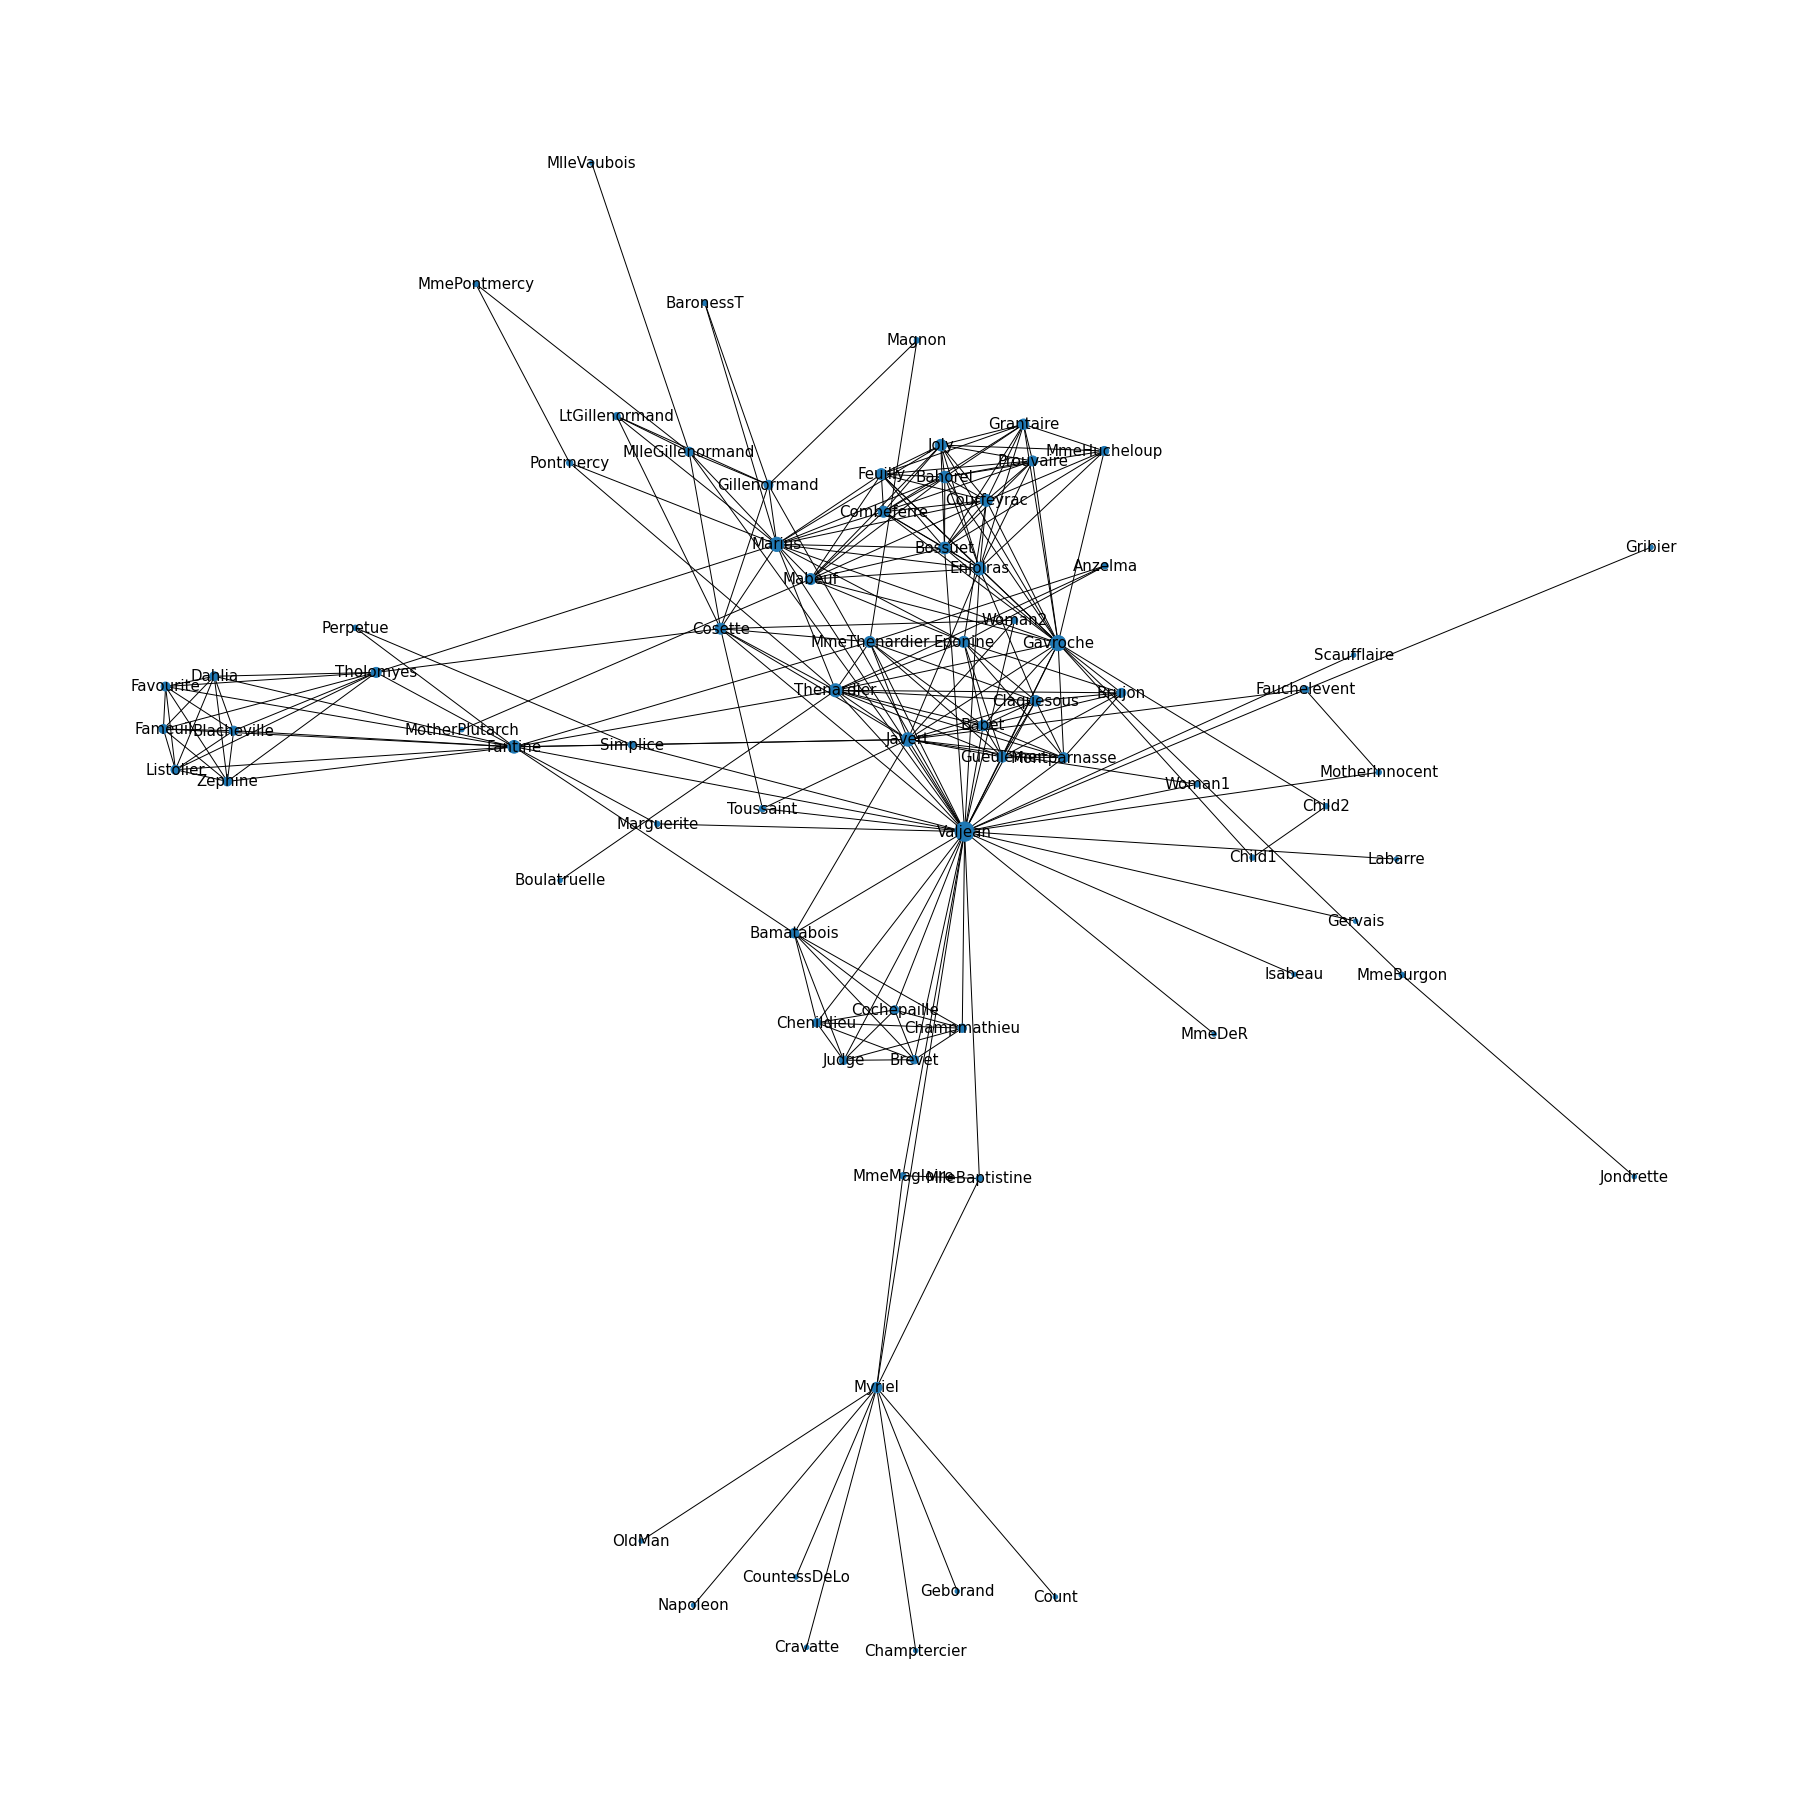

In [19]:
plt.figure(figsize=(25, 25))

degree = nx.degree(G)
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=[10 + v[1]*10 for v in degree], font_size = 15)

plt.show()

In [20]:
print('degree centrality:\n', nx.degree_centrality(G))
print('betweenness centrality:\n', nx.betweenness_centrality(G))
print('closeness centrality:\n', nx.closeness_centrality(G))
print('eigenvector centrality:\n', nx.eigenvector_centrality(G))

degree centrality:
 {'Myriel': 0.13157894736842105, 'Napoleon': 0.013157894736842105, 'MlleBaptistine': 0.039473684210526314, 'MmeMagloire': 0.039473684210526314, 'CountessDeLo': 0.013157894736842105, 'Geborand': 0.013157894736842105, 'Champtercier': 0.013157894736842105, 'Cravatte': 0.013157894736842105, 'Count': 0.013157894736842105, 'OldMan': 0.013157894736842105, 'Labarre': 0.013157894736842105, 'Valjean': 0.47368421052631576, 'Marguerite': 0.02631578947368421, 'MmeDeR': 0.013157894736842105, 'Isabeau': 0.013157894736842105, 'Gervais': 0.013157894736842105, 'Tholomyes': 0.11842105263157894, 'Listolier': 0.09210526315789473, 'Fameuil': 0.09210526315789473, 'Blacheville': 0.09210526315789473, 'Favourite': 0.09210526315789473, 'Dahlia': 0.09210526315789473, 'Zephine': 0.09210526315789473, 'Fantine': 0.19736842105263158, 'MmeThenardier': 0.14473684210526316, 'Thenardier': 0.21052631578947367, 'Cosette': 0.14473684210526316, 'Javert': 0.22368421052631576, 'Fauchelevent': 0.0526315789473

- 앞서 불러온 데이터셋을 사용하여 이후 실습을 진행

In [21]:
deg_cen = nx.degree_centrality(G)
bet_cen = nx.betweenness_centrality(G)
clo_cen = nx.closeness_centrality(G)
eig_cen = nx.eigenvector_centrality(G)

In [22]:
# 각 centrality별 가장 값이 높은 3개의 node 추출
print('degree centrality:\n', sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:4])
print('betweenness centrality:\n', sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:4])
print('closeness centrality:\n', sorted(clo_cen.items(), key=lambda x:x[1], reverse=True)[0:4])
print('eigenvector centrality:\n', sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[0:4])

degree centrality:
 [('Valjean', 0.47368421052631576), ('Gavroche', 0.2894736842105263), ('Marius', 0.25), ('Javert', 0.22368421052631576)]
betweenness centrality:
 [('Valjean', 0.5699890527836184), ('Myriel', 0.17684210526315788), ('Gavroche', 0.16511250242584766), ('Marius', 0.132032488621946)]
closeness centrality:
 [('Valjean', 0.6440677966101694), ('Marius', 0.5314685314685315), ('Thenardier', 0.5170068027210885), ('Javert', 0.5170068027210885)]
eigenvector centrality:
 [('Gavroche', 0.31783893977497674), ('Valjean', 0.2676181759885393), ('Enjolras', 0.26717863282356663), ('Marius', 0.25911114534178753)]


weight으로 distance를 측정했을 떄

In [23]:
print('Degree centrality with weight:\n', sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:4])
print('betweenness centrality with weight:\n', sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:4])
print('closeness centrality with weight:\n', sorted(clo_cen.items(), key=lambda x:x[1], reverse=True)[0:4])
print('eigenvector centrality with weight:\n', sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[0:4])

Degree centrality with weight:
 [('Valjean', 0.47368421052631576), ('Gavroche', 0.2894736842105263), ('Marius', 0.25), ('Javert', 0.22368421052631576)]
betweenness centrality with weight:
 [('Valjean', 0.5699890527836184), ('Myriel', 0.17684210526315788), ('Gavroche', 0.16511250242584766), ('Marius', 0.132032488621946)]
closeness centrality with weight:
 [('Valjean', 0.6440677966101694), ('Marius', 0.5314685314685315), ('Thenardier', 0.5170068027210885), ('Javert', 0.5170068027210885)]
eigenvector centrality with weight:
 [('Gavroche', 0.31783893977497674), ('Valjean', 0.2676181759885393), ('Enjolras', 0.26717863282356663), ('Marius', 0.25911114534178753)]




---



---



---



## Link Prediction
- 노드 간 missing/latent link 예측
  - 구조적 유사성 지표를 통해 두 노드 간 유사한 정보를 기반으로 예측
- [indices](https://medium.com/neo4j/link-prediction-with-neo4j-part-1-an-introduction-713aa779fd9): Common Neighbors, Adamic Adar, Preferential Attachment, Katz 등 [networkx](https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html)에서 일부 link prediction metrics 제공

In [24]:
common_neighbor = [(e[0], e[1], len(list(nx.common_neighbors(G, e[0], e[1])))) for e in nx.non_edges(G)]
common_neighbor.sort(key=lambda x: x[-1], reverse=True)
common_neighbor[:20]

[('Grantaire', 'Mabeuf', 8),
 ('Grantaire', 'Marius', 8),
 ('Gavroche', 'Claquesous', 8),
 ('Gavroche', 'Eponine', 8),
 ('Mabeuf', 'Prouvaire', 8),
 ('Prouvaire', 'Marius', 8),
 ('Valjean', 'Eponine', 7),
 ('Montparnasse', 'MmeThenardier', 7),
 ('Feuilly', 'MmeHucheloup', 7),
 ('Prouvaire', 'MmeHucheloup', 7),
 ('Combeferre', 'MmeHucheloup', 7),
 ('Valjean', 'Brujon', 6),
 ('Javert', 'Eponine', 6),
 ('Javert', 'Brujon', 6),
 ('Mabeuf', 'MmeHucheloup', 6),
 ('Marius', 'MmeHucheloup', 6),
 ('Gavroche', 'MmeThenardier', 5),
 ('Javert', 'Marius', 5),
 ('Enjolras', 'Thenardier', 5),
 ('MmeThenardier', 'Brujon', 5)]

In [25]:
'''
공통 이웃이 많은 경우 더 연결될 가능성이 높음
'''
common_neighbor = nx.common_neighbor_centrality(G)
common_neighbor = list(common_neighbor)
common_neighbor.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in common_neighbor[:10]:
    print(f"({u}, {v}) -> {p}")

(Grantaire, Mabeuf) -> 14.099999999999998
(Grantaire, Marius) -> 14.099999999999998
(Gavroche, Claquesous) -> 14.099999999999998
(Gavroche, Eponine) -> 14.099999999999998
(Mabeuf, Prouvaire) -> 14.099999999999998
(Prouvaire, Marius) -> 14.099999999999998
(Valjean, Eponine) -> 13.299999999999999
(Montparnasse, MmeThenardier) -> 13.299999999999999
(Feuilly, MmeHucheloup) -> 13.299999999999999
(Prouvaire, MmeHucheloup) -> 13.299999999999999


In [26]:
'''
노드가 공통 이웃을 통해 다른 노드에 보낼 수 있는 정보를 기반으로 측정
'''
aa = nx.adamic_adar_index(G)
aa = list(aa)
aa.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in aa[:10]:
    print(f"({u}, {v}) -> {p}")

(Gavroche, Eponine) -> 3.3448075882825483
(Gavroche, Claquesous) -> 3.1995614899211535
(Grantaire, Mabeuf) -> 3.1114513083322697
(Grantaire, Marius) -> 3.1114513083322697
(Mabeuf, Prouvaire) -> 3.1114513083322697
(Prouvaire, Marius) -> 3.1114513083322697
(Valjean, Eponine) -> 2.8753324825647697
(Montparnasse, MmeThenardier) -> 2.712601034496627
(Feuilly, MmeHucheloup) -> 2.7116810073870288
(Prouvaire, MmeHucheloup) -> 2.7116810073870288


In [27]:
'''
degree가 높은 노드들이 결국은 연결될 것이라는 관점
'''
pa = nx.preferential_attachment(G)
pa = list(pa)
pa.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in pa[:10]:
    print(f"({u}, {v}) -> {p}")

(Valjean, Courfeyrac) -> 468
(Valjean, Joly) -> 432
(Valjean, Bahorel) -> 432
(Valjean, Feuilly) -> 396
(Valjean, Mabeuf) -> 396
(Valjean, Combeferre) -> 396
(Valjean, Eponine) -> 396
(Grantaire, Valjean) -> 360
(Gavroche, Fantine) -> 330
(Valjean, Prouvaire) -> 324


In [28]:
Gyuk = nx.Graph()
for a,b,c in G.edges(data=True):
    Gyuk.add_node(a)
    Gyuk.add_node(b)
    Gyuk.add_edge(a,b,weight = 1.0 / (c.get('value')))

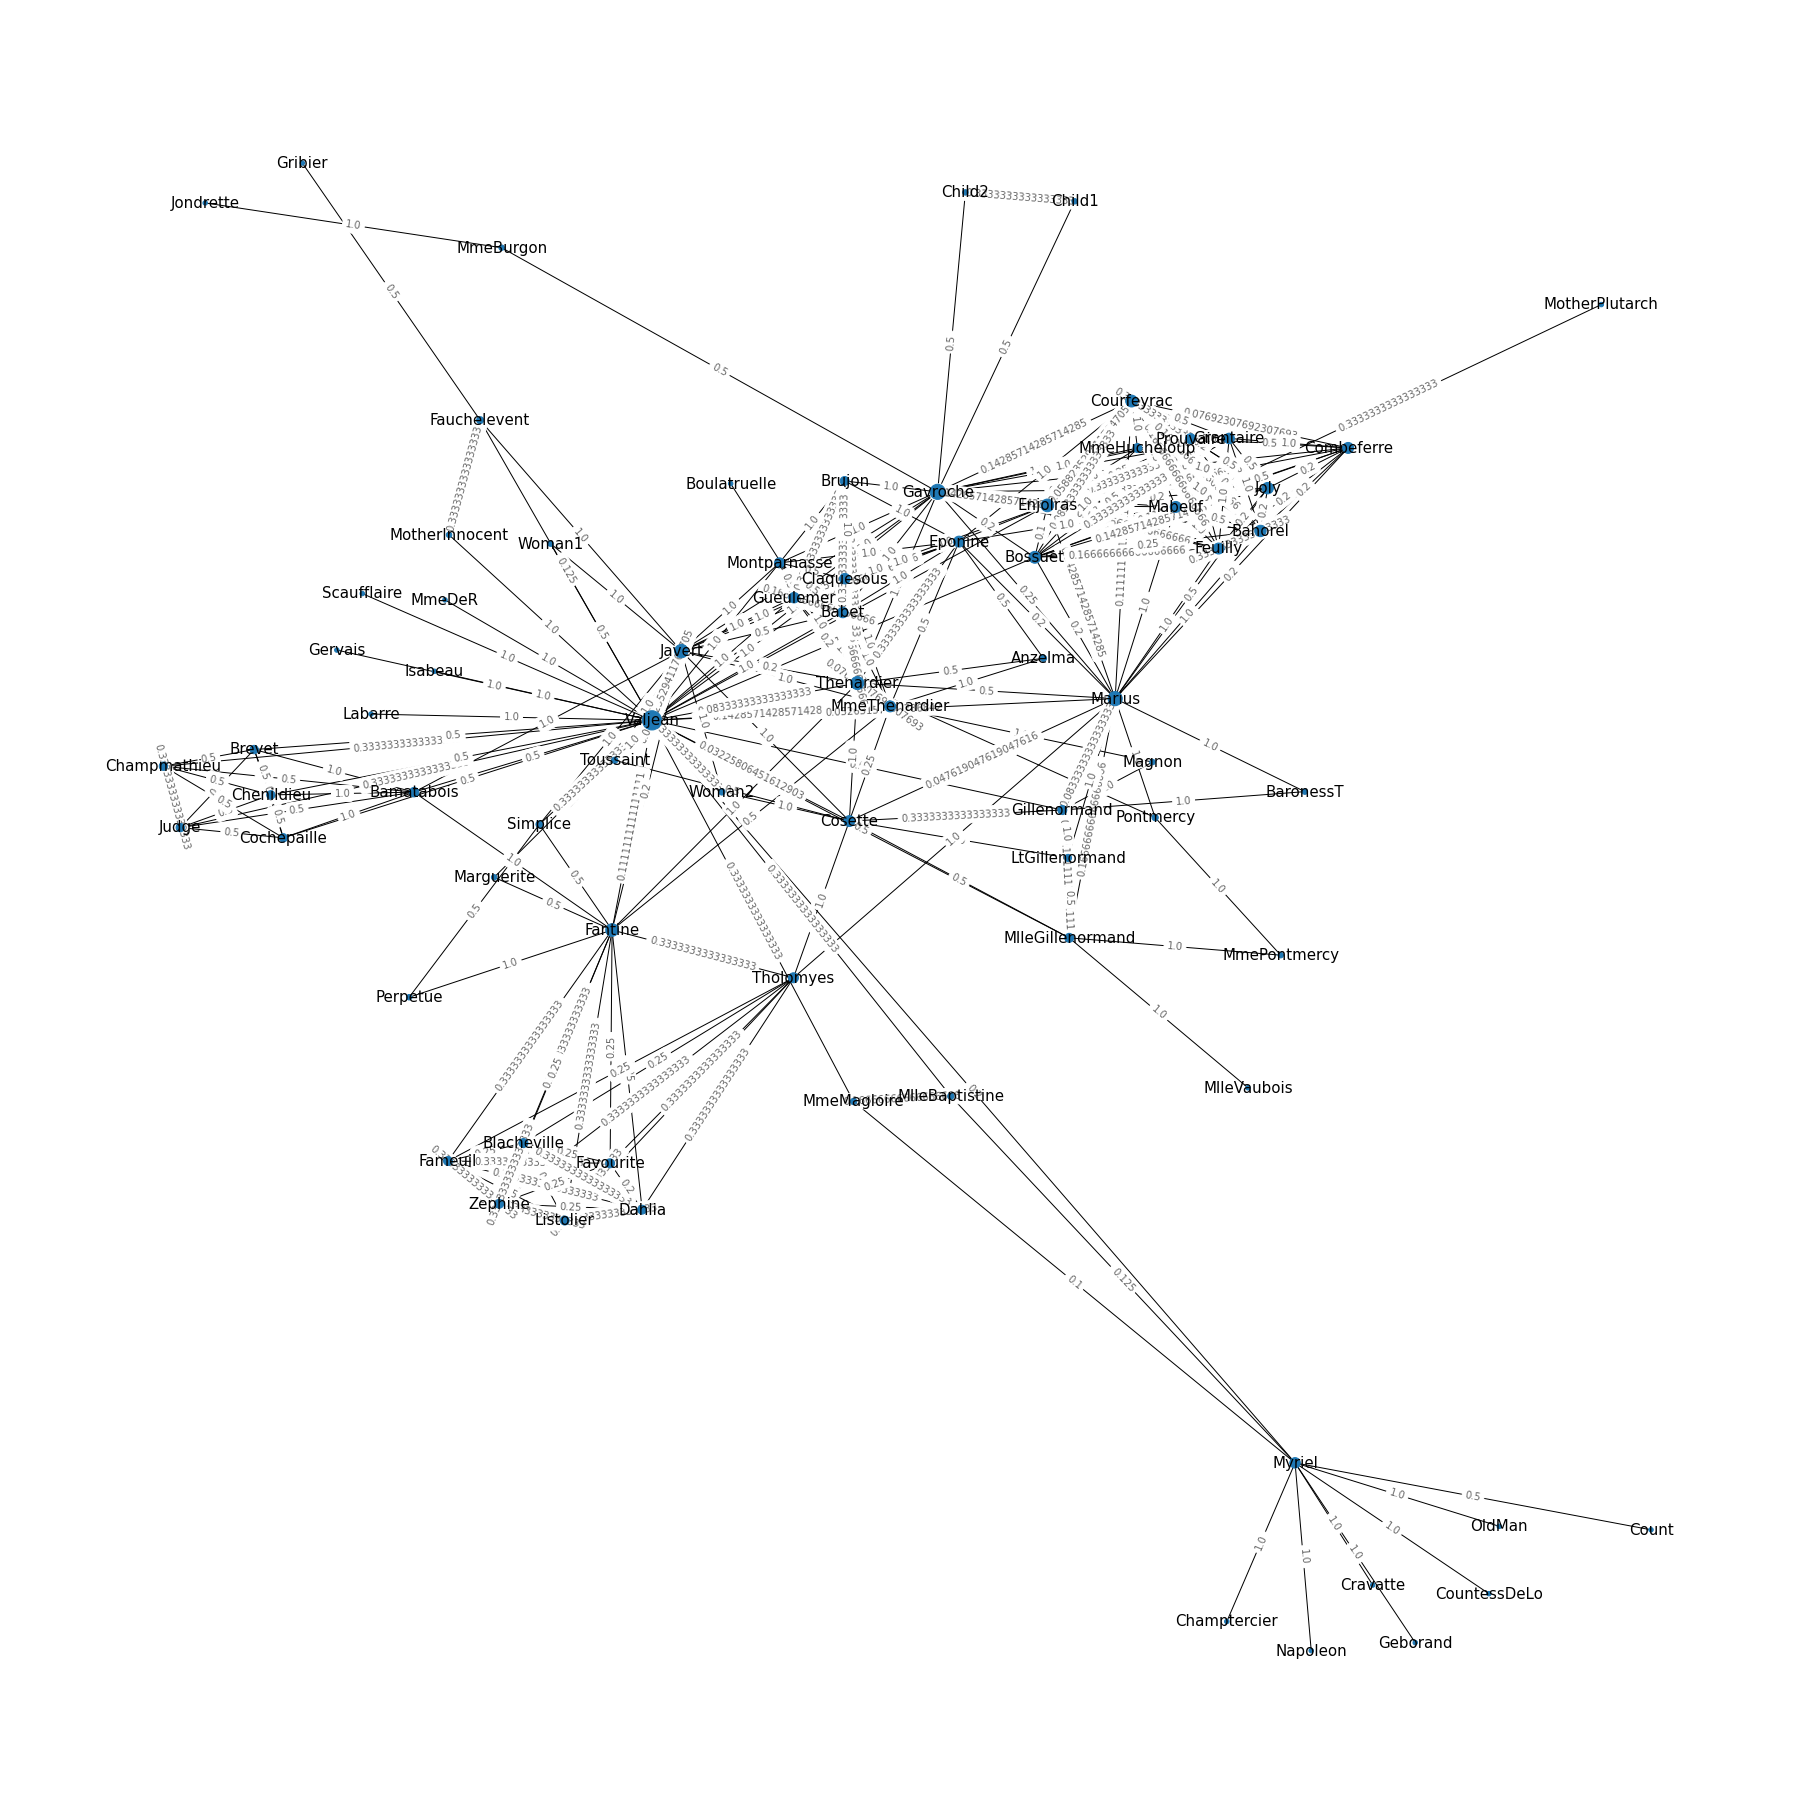

In [29]:
plt.figure(figsize=(25, 25))

degree = nx.degree(Gyuk)
pos=nx.spring_layout(Gyuk)
nx.draw(Gyuk, pos, with_labels=True, node_size=[10 + v[1]*10 for v in degree], font_size = 15) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
edge_weight = nx.get_edge_attributes(Gyuk, 'weight')
nx.draw_networkx_edge_labels(Gyuk, pos, edge_labels = edge_weight, alpha=0.6, font_size=10) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html
plt.show()

In [30]:
X = input()
Y = input()

nx.shortest_path(Gyuk, X, Y)

Gavroche
Eponine


['Gavroche', 'Thenardier', 'Eponine']

In [31]:
X = input()
Y = input()

nx.shortest_path(Gyuk, X, Y)

Courfeyrac
Myriel


['Courfeyrac', 'Gavroche', 'Valjean', 'Myriel']